In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
!pip install ipython-autotime
%load_ext autotime

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
time: 1.97 ms (started: 2024-08-21 09:47:45 +00:00)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 2.78 s (started: 2024-08-21 09:49:03 +00:00)


In [ ]:
from google.colab import files
import os
import shutil

# Copy scripts from Google Drive to Colab
shutil.copy('/content/drive/MyDrive/THESIS/classifiers/scripts/feature_selectors.py', '/content/feature_selectors.py')
shutil.copy('/content/drive/MyDrive/THESIS/classifiers/scripts/knn_classifier.py', '/content/knn_classifier.py')
shutil.copy('/content/drive/MyDrive/THESIS/classifiers/scripts/utils.py', '/content/utils.py')

'/content/utils.py'

time: 3.22 s (started: 2024-08-21 09:49:06 +00:00)


In [ ]:
import pandas as pd

# Load the CSV file
file_path = '/content/drive/MyDrive/THESIS/classifiers/data/data_p9_preprocessed.csv'
df = pd.read_csv(file_path)

# Rename 'non-breathy' phonations to 'flow'
df.replace({'phonation': 'non-breathy'}, 'flow', inplace=True)

# Save the modified DataFrame back to a CSV file
df.to_csv('/content/drive/MyDrive/THESIS/classifiers/data/data_p9_preprocessed_modified.csv', index=False)


time: 37.1 s (started: 2024-08-21 11:19:37 +00:00)


# Phonation Mode KNN Classification

This classification is just for 2 phonation modes (for the 2 participants used for building this model) and might need extending based on the participant used. This would also require labelleing unlabelled participants phonation modes.

Using multilayer perceptron model could prove better for more complex classification tasks. Used in Furkan thesis/paper in phonation mode classification. However, since phonation is only using 2 classes, the MLP is forth developed for the recording condition classification task.

As the phonation classification for this is simply a 2 way classification task, a KNN should be sufficient for the task. Therefore it is the forst thing tested. However, of course should the phonation modes supported increase, then the classification task would become more complex and using a simple KNN would liekly not suffice.

In [ ]:
RANDOM_STATE = 42
DATA_FILE = '/content/drive/MyDrive/THESIS/classifiers/data/data_combined.csv'

from knn_classifier import train_and_test_knn, evaluate_model
from utils import prepare_data, plot_confusion_matrix, calculate_metrics_2_class, remove_specified_conditions
from sklearn.model_selection import train_test_split

time: 1.27 ms (started: 2024-08-21 11:05:54 +00:00)


## 1. Complete data

Accuracy:  0.9073
Returned F1 score:  0.9072
Precision:  0.8883
Recall:  0.9319
Specificity:  0.8826
False positive rate:  0.1174


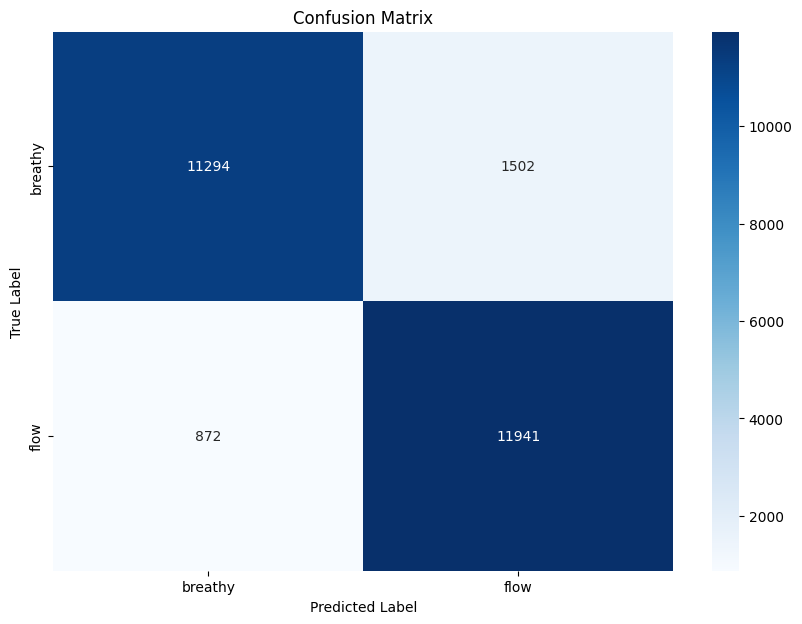

time: 1min 28s (started: 2024-08-21 11:25:10 +00:00)


In [34]:
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='phonation', algorithm='knn')
class_names = y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate model
y_pred = train_and_test_knn(x_train, y_train, x_test)
accuracy, f1, conf_matrix = evaluate_model(y_test, y_pred)

precision, recall, specificity, fpr = calculate_metrics_2_class(conf_matrix)

print("Accuracy: ", round(accuracy, 4))
print("Returned F1 score: ", round(f1, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))
print("Specificity: ", round(specificity, 4))
print("False positive rate: ", round(fpr, 4))

plot_confusion_matrix(conf_matrix, class_names=class_names)


#### Top 5 features only

Selected features:  Index(['computer_mfcc_1', 'computer_mfcc_3', 'computer_pose_landmark_13_z',
       'computer_pose_landmark_24_z', 'computer_pose_landmark_25_z'],
      dtype='object')
Accuracy:  0.7783
Returned F1 score:  0.7783
Precision:  0.7753
Recall:  0.7841
Specificity:  0.7724
False positive rate:  0.2276


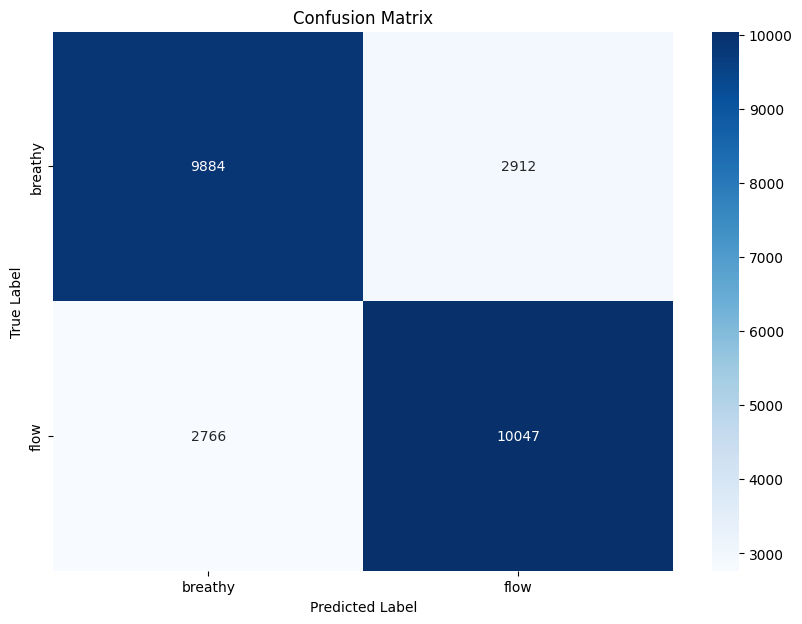

time: 13.1 s (started: 2024-08-21 11:26:39 +00:00)


In [35]:
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='phonation', algorithm='knn', num_features=5)
class_names = y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate model
y_pred = train_and_test_knn(x_train, y_train, x_test)
accuracy, f1, conf_matrix = evaluate_model(y_test, y_pred)
precision, recall, specificity, fpr = calculate_metrics_2_class(conf_matrix)

print("Accuracy: ", round(accuracy, 4))
print("Returned F1 score: ", round(f1, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))
print("Specificity: ", round(specificity, 4))
print("False positive rate: ", round(fpr, 4))

plot_confusion_matrix(conf_matrix, class_names=class_names)

The automatic feature selection is not robust enough, because it doesn't understand the data. Unfortunately the positioning of the camera for the two phonation conditions is slightly different, meaning that the lower limb points are or are not visible more depending on thephonation mode condition.

Therefore, feature selection must be done after disregarding the lower

## 2. Audio Only

In [36]:
modalities = [
    "audio"
]

time: 1.49 ms (started: 2024-08-21 11:26:52 +00:00)


#### All audio features

Accuracy:  0.8125
Returned F1 score:  0.8124
Precision:  0.8288
Recall:  0.7881
Specificity:  0.837
False positive rate:  0.163


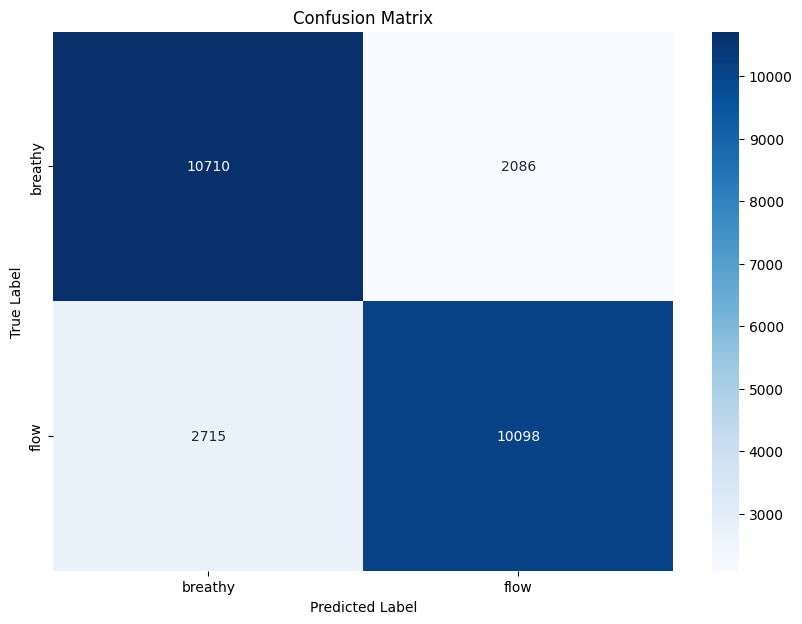

time: 29.4 s (started: 2024-08-21 11:26:52 +00:00)


In [37]:
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='phonation', algorithm='knn', modalities=modalities)
class_names = y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate model
y_pred = train_and_test_knn(x_train, y_train, x_test)
accuracy, f1, conf_matrix = evaluate_model(y_test, y_pred)
precision, recall, specificity, fpr = calculate_metrics_2_class(conf_matrix)

print("Accuracy: ", round(accuracy, 4))
print("Returned F1 score: ", round(f1, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))
print("Specificity: ", round(specificity, 4))
print("False positive rate: ", round(fpr, 4))

plot_confusion_matrix(conf_matrix, class_names=class_names)

#### Top 5 audio features

Selected features:  Index(['computer_rms_energy', 'computer_spec_slope', 'computer_spec_decr',
       'computer_mfcc_1', 'computer_mfcc_3'],
      dtype='object')
Accuracy:  0.774
Returned F1 score:  0.774
Precision:  0.7703
Recall:  0.7814
Specificity:  0.7666
False positive rate:  0.2334


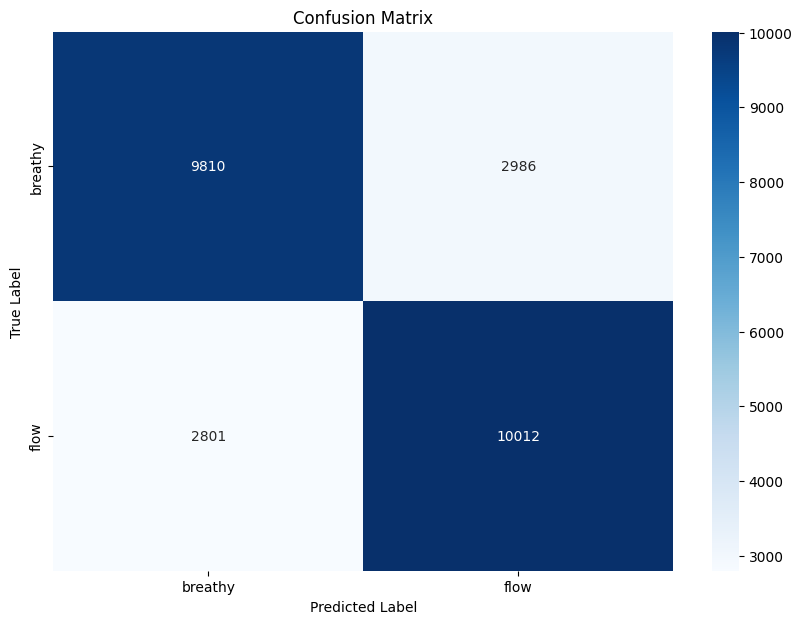

time: 10.5 s (started: 2024-08-21 11:27:22 +00:00)


In [38]:
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='phonation', algorithm='knn', modalities=modalities, num_features=5)
class_names = y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate model
y_pred = train_and_test_knn(x_train, y_train, x_test)
accuracy, f1, conf_matrix = evaluate_model(y_test, y_pred)
precision, recall, specificity, fpr = calculate_metrics_2_class(conf_matrix)

print("Accuracy: ", round(accuracy, 4))
print("Returned F1 score: ", round(f1, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))
print("Specificity: ", round(specificity, 4))
print("False positive rate: ", round(fpr, 4))

plot_confusion_matrix(conf_matrix, class_names=class_names)

## 3. Video Only

In [39]:
modalities = [
    "video"
]

time: 865 µs (started: 2024-08-21 11:27:32 +00:00)


Accuracy:  0.9996
Returned F1 score:  0.9996
Precision:  0.9998
Recall:  0.9995
Specificity:  0.9998
False positive rate:  0.0002


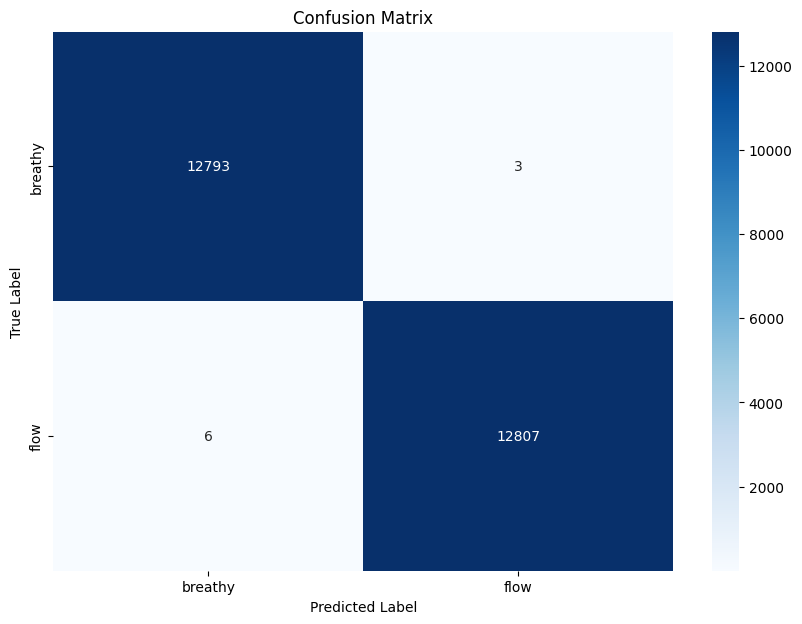

time: 1min 12s (started: 2024-08-21 11:27:32 +00:00)


In [40]:
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='phonation', algorithm='knn', modalities=modalities)
class_names = y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate model
y_pred = train_and_test_knn(x_train, y_train, x_test)
accuracy, f1, conf_matrix = evaluate_model(y_test, y_pred)
precision, recall, specificity, fpr = calculate_metrics_2_class(conf_matrix)

print("Accuracy: ", round(accuracy, 4))
print("Returned F1 score: ", round(f1, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))
print("Specificity: ", round(specificity, 4))
print("False positive rate: ", round(fpr, 4))

plot_confusion_matrix(conf_matrix, class_names=class_names)

#### Top 5 video features

Selected features:  Index(['computer_pose_landmark_1_z', 'computer_pose_landmark_11_z',
       'computer_pose_landmark_13_z', 'computer_pose_landmark_24_z',
       'computer_pose_landmark_25_z'],
      dtype='object')
Accuracy:  0.9737
Returned F1 score:  0.9737
Precision:  0.9741
Recall:  0.9733
Specificity:  0.9741
False positive rate:  0.0259


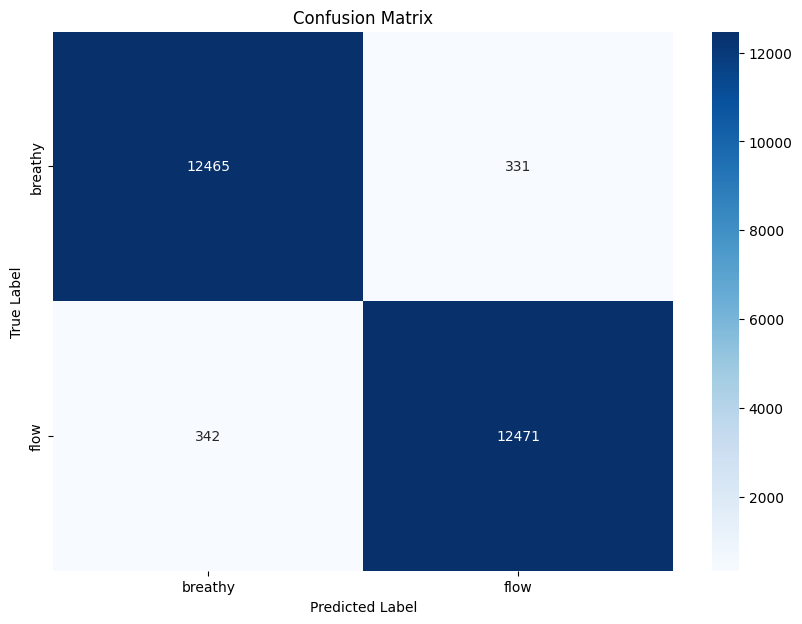

time: 12.7 s (started: 2024-08-21 11:28:44 +00:00)


In [41]:
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='phonation', algorithm='knn', modalities=modalities, num_features=5)
class_names = y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate model
y_pred = train_and_test_knn(x_train, y_train, x_test)
accuracy, f1, conf_matrix = evaluate_model(y_test, y_pred)
precision, recall, specificity, fpr = calculate_metrics_2_class(conf_matrix)

print("Accuracy: ", round(accuracy, 4))
print("Returned F1 score: ", round(f1, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))
print("Specificity: ", round(specificity, 4))
print("False positive rate: ", round(fpr, 4))

plot_confusion_matrix(conf_matrix, class_names=class_names)

## 4. Biosignal Data Only

In [42]:
modalities = [
    "biosignals"
]

time: 868 µs (started: 2024-08-21 11:28:57 +00:00)


Accuracy:  0.5502
Returned F1 score:  0.5501
Precision:  0.5491
Recall:  0.5647
Specificity:  0.5357
False positive rate:  0.4643


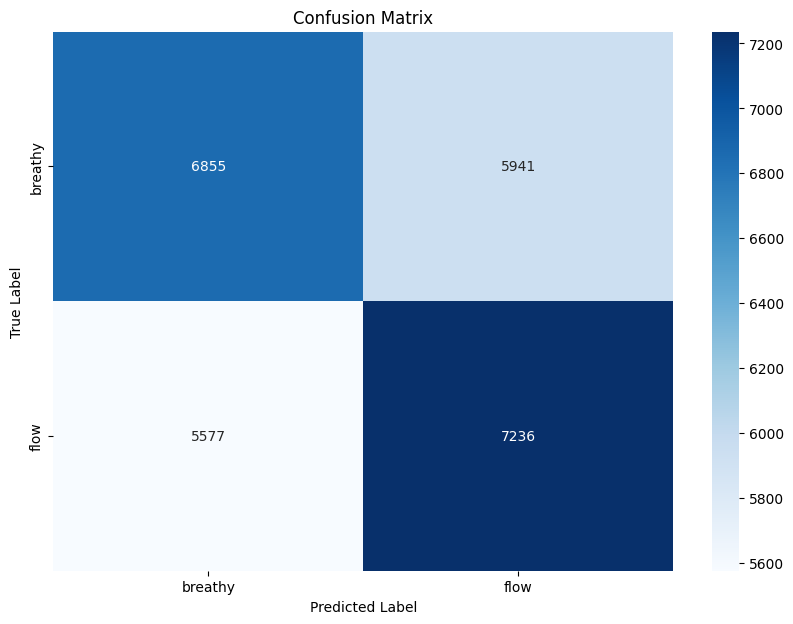

time: 10.2 s (started: 2024-08-21 11:28:57 +00:00)


In [43]:
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='phonation', algorithm='knn', modalities=modalities)
class_names = y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate model
y_pred = train_and_test_knn(x_train, y_train, x_test)
accuracy, f1, conf_matrix = evaluate_model(y_test, y_pred)
precision, recall, specificity, fpr = calculate_metrics_2_class(conf_matrix)

print("Accuracy: ", round(accuracy, 4))
print("Returned F1 score: ", round(f1, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))
print("Specificity: ", round(specificity, 4))
print("False positive rate: ", round(fpr, 4))

plot_confusion_matrix(conf_matrix, class_names=class_names)